In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
data = pd.read_csv("Data\\Iris.csv")
data = data.reindex(np.random.permutation(data.index))
le = LabelEncoder()

In [16]:
label_name = "Species"
label = data[label_name] = le.fit_transform(data[label_name])
features = {name:np.array(value) for name, value in data.items()}
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
131,132,7.9,3.8,6.4,2.0,2
141,142,6.9,3.1,5.1,2.3,2
29,30,4.7,3.2,1.6,0.2,0
127,128,6.1,3.0,4.9,1.8,2
147,148,6.5,3.0,5.2,2.0,2
139,140,6.9,3.1,5.4,2.1,2
91,92,6.1,3.0,4.6,1.4,1
104,105,6.5,3.0,5.8,2.2,2
3,4,4.6,3.1,1.5,0.2,0
93,94,5.0,2.3,3.3,1.0,1


In [6]:
def output_linear_regression(preprocessed_layer):
    output_dense = layers.Dense(units = 1, name= "output_dense")(preprocessed_layer)
    output = {
        "output_dense": output_dense
    }
    return output

def build_model(my_learning_rate, input, output):
    model = keras.Model(inputs= input, outputs= output)

    model.compile(optimizer = keras.optimizers.experimental.RMSprop(learning_rate= my_learning_rate),
                 loss = "mean_absolute_error",
                 metrics = [keras.metrics.RootMeanSquaredError()])
    return model

def train_model(model, df, label_name, batch_size, epochs):
    feature = {name:np.array(value) for name, value in df.items()}
    label = np.array(feature.pop(label_name))

    history = model.fit(x= feature,y= label, batch_size= batch_size, epochs=epochs)
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    rmse = hist["root_mean_squared_error"]
    return epochs, hist, rmse

In [7]:
Input = {
    "SepalLengthCm": tf.keras.layers.Input(shape= (1,),
                                           name= "SepalLengthCm",
                                           dtype= tf.float32),

    "SepalWidthCm": tf.keras.layers.Input(shape= (1,),
                                          name= "SepalWidthCm",
                                          dtype= tf.float32),

    "PetalLengthCm": tf.keras.layers.Input(shape= (1,),
                                           name= "PetalLengthCm",
                                           dtype= tf.float32),

    "PetalWidthCm": tf.keras.layers.Input(shape= (1,),
                                          name= "PetalWidthCm",
                                          dtype= tf.float32)
}

# Crosses


In [8]:
Resolution_Degree = 1.0

SepalLengthCm_Boundaries = list(np.arange(int(min(data["SepalLengthCm"])), int(max(data["SepalLengthCm"])), Resolution_Degree))
SepalWidthCm_Boundaries = list(np.arange(int(min(data["SepalWidthCm"])), int(max(data["SepalWidthCm"])), Resolution_Degree))

SepalLengthCm = tf.keras.layers.Discretization(
    bin_boundaries = SepalLengthCm_Boundaries,
    name = "SepalLengthCm_Binned"
)(Input.get("SepalLengthCm"))

SepalWidthCm = tf.keras.layers.Discretization(
    bin_boundaries = SepalWidthCm_Boundaries,
    name = "SepalWidthCm_Binned"
)(Input.get("SepalWidthCm"))

Sepal = tf.keras.layers.HashedCrossing(
    num_bins = len(SepalLengthCm_Boundaries + SepalWidthCm_Boundaries),
    name = "Sepal_Crosses_Layer",
    output_mode = "one_hot"
)([SepalLengthCm, SepalWidthCm])

In [9]:
PetalLengthCm_Boundaries = list(np.arange(int(min(data["PetalLengthCm"])), int(max(data["PetalLengthCm"])), Resolution_Degree))
PetalWidthCm_Boundaries = list(np.arange(int(min(data["PetalWidthCm"])), int(max(data["PetalWidthCm"])), Resolution_Degree))

PetalLengthCm = tf.keras.layers.Discretization(
    bin_boundaries = PetalLengthCm_Boundaries,
    name = "PetalLengthCm_Binned"
)(Input.get("PetalLengthCm"))

PetalWidthCm = tf.keras.layers.Discretization(
    bin_boundaries = PetalWidthCm_Boundaries,
    name = "PetalWidthCm_Binned"
)(Input.get("PetalWidthCm"))

Petal = tf.keras.layers.HashedCrossing(
    num_bins = len(PetalLengthCm_Boundaries + PetalWidthCm_Boundaries),
    name = "Petal_Crosses_Layer",
    output_mode = "one_hot"
)([PetalLengthCm, PetalWidthCm])

Concatenation Layer

In [10]:
Concatenate = tf.keras.layers.Concatenate()([Sepal, Petal])
Output = output_linear_regression(Concatenate)

feature = {name:np.array(value) for name, value in data.items()}
label = np.array(feature.pop(label_name))
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.3, random_state=1, shuffle= True)

In [11]:
learning_rate = 0.1
batch_size = 30
epochs = 35
label_name = "Species"
model = build_model(my_learning_rate= learning_rate, input= Input, output=Output)
epochs, hist, rmse = train_model(model=model, batch_size= batch_size, epochs=epochs, df= X_train, label_name=label_name)


Epoch 1/35


d:\Python\Lib\site-packages\keras\src\engine\functional.py:642: UserWarning: Input dict contained keys ['Id'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


4/4 [==============================] - 1s 10ms/step - loss: 0.5358 - root_mean_squared_error: 0.7095
Epoch 2/35
4/4 [==============================] - 0s 7ms/step - loss: 0.3480 - root_mean_squared_error: 0.4451
Epoch 3/35
4/4 [==============================] - 0s 6ms/step - loss: 0.2967 - root_mean_squared_error: 0.3859
Epoch 4/35
4/4 [==============================] - 0s 6ms/step - loss: 0.2820 - root_mean_squared_error: 0.4263
Epoch 5/35
4/4 [==============================] - 0s 5ms/step - loss: 0.2766 - root_mean_squared_error: 0.3892
Epoch 6/35
4/4 [==============================] - 0s 1ms/step - loss: 0.2346 - root_mean_squared_error: 0.3643
Epoch 7/35
4/4 [==============================] - 0s 5ms/step - loss: 0.3142 - root_mean_squared_error: 0.4509
Epoch 8/35
4/4 [==============================] - 0s 5ms/step - loss: 0.2564 - root_mean_squared_error: 0.3790
Epoch 9/35
4/4 [==============================] - 0s 3ms/step - loss: 0.2097 - root_mean_squared_error: 0.3756
Epoch 10/35

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 SepalLengthCm (InputLayer)  [(None, 1)]                  0         []                            
                                                                                                  
 SepalWidthCm (InputLayer)   [(None, 1)]                  0         []                            
                                                                                                  
 PetalLengthCm (InputLayer)  [(None, 1)]                  0         []                            
                                                                                                  
 PetalWidthCm (InputLayer)   [(None, 1)]                  0         []                            
                                                                                              

                                                                                                  
 SepalWidthCm_Binned (Discr  (None, 1)                    0         ['SepalWidthCm[0][0]']        
 etization)                                                                                       
                                                                                                  
 PetalLengthCm_Binned (Disc  (None, 1)                    0         ['PetalLengthCm[0][0]']       
 retization)                                                                                      
                                                                                                  
 PetalWidthCm_Binned (Discr  (None, 1)                    0         ['PetalWidthCm[0][0]']        
 etization)                                                                                       
                                                                                                  
 Sepal_Cro

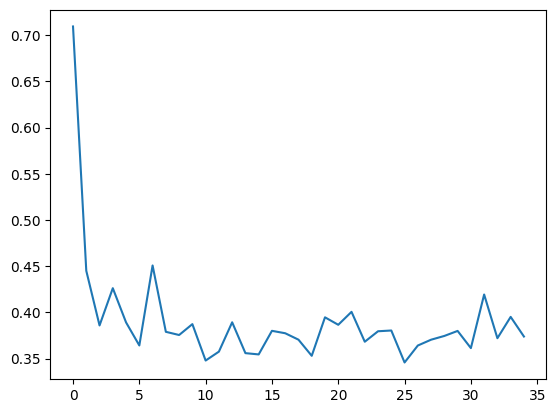

In [14]:
plt.plot(epochs, rmse)
model.summary()

In [13]:
feature_test = {name:np.array(value) for name, value in X_test.items()}
label_test = np.array(feature_test.pop("Species"))
model.evaluate(x=feature_test, y=label_test, batch_size=batch_size)

2/2 [==============================] - 0s 1ms/step - loss: 0.2147 - root_mean_squared_error: 0.3846


[0.2147035449743271, 0.3846331834793091]